In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Categorical Data

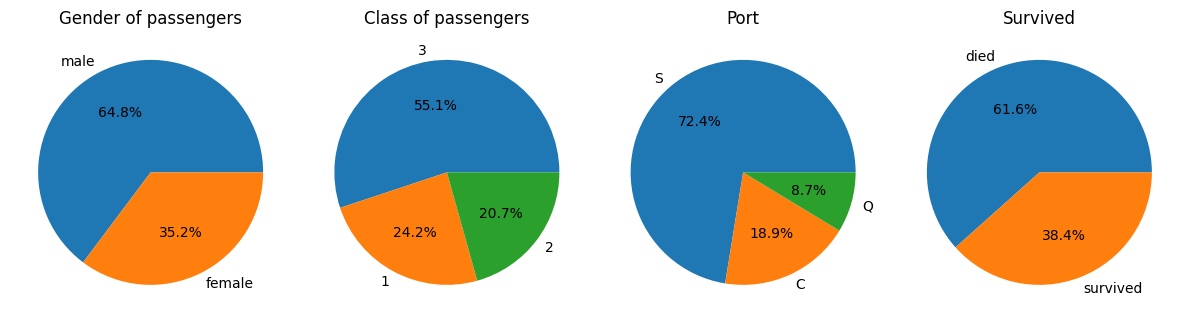

In [3]:
gender_counts = df['Sex'].value_counts()
class_counts = df['Pclass'].value_counts()
emb_counts = df['Embarked'].value_counts()
s_counts = df['Survived'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))

axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
axes[0].set_title("Gender of passengers")

axes[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
axes[1].set_title("Class of passengers")

axes[2].pie(emb_counts, labels=emb_counts.index, autopct='%1.1f%%')
axes[2].set_title("Port")

si = ['died', 'survived']
axes[3].pie(s_counts, labels=si, autopct='%1.1f%%')
axes[3].set_title("Survived")

plt.tight_layout()
plt.show()


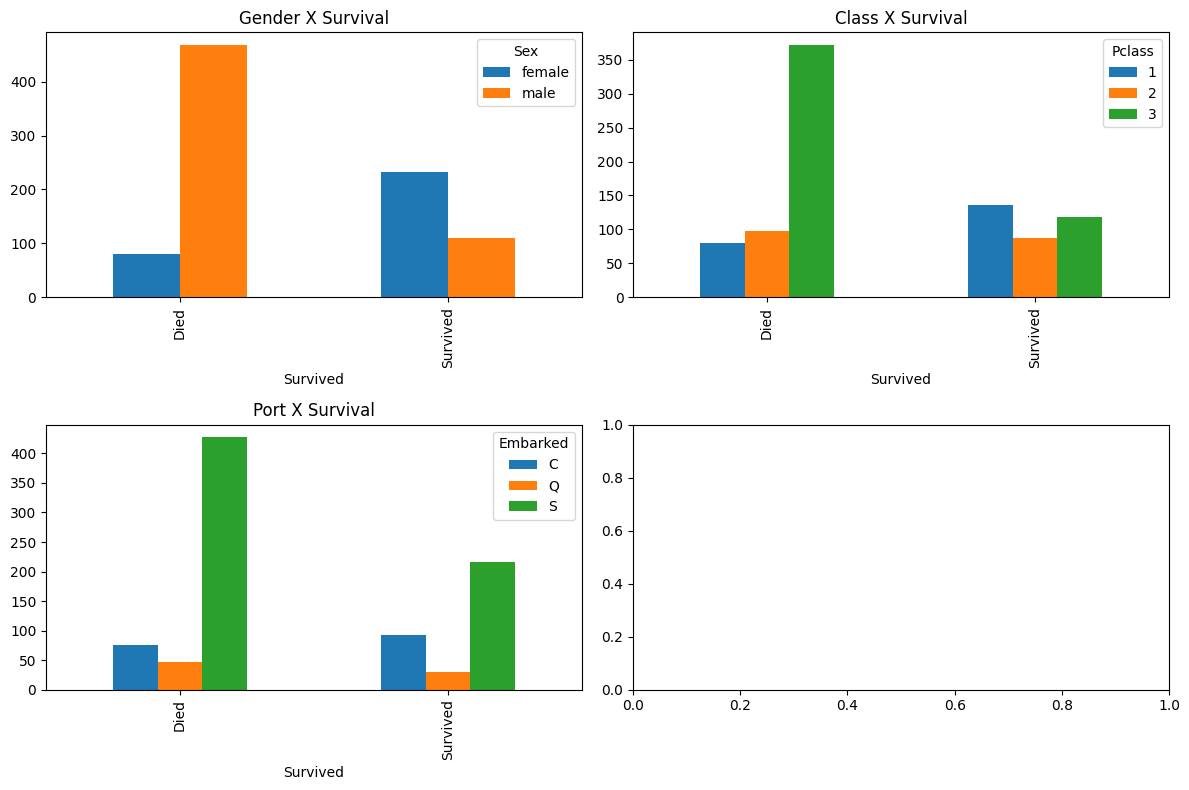

In [4]:
grouped_data = df.groupby(['Survived', 'Sex']).size().unstack()
surv_class = df.groupby(['Survived', 'Pclass']).size().unstack()
surv_port = df.groupby(['Survived', 'Embarked']).size().unstack()

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

grouped_data.plot(kind='bar', ax=axes[0,0])
axes[0, 0].set_xticklabels(['Died', 'Survived'])
axes[0, 0].set_title("Gender X Survival")

surv_class.plot(kind='bar', ax=axes[0,1])
axes[0, 1].set_xticklabels(['Died', 'Survived'])
axes[0, 1].set_title("Class X Survival")

surv_port.plot(kind='bar', ax=axes[1,0])
axes[1, 0].set_xticklabels(['Died', 'Survived'])
axes[1, 0].set_title("Port X Survival")

plt.tight_layout()
plt.show()


#### Non Categorical Data

In [5]:
cols = ['Age', 'SibSp', 'Parch', 'Fare']
df[cols].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


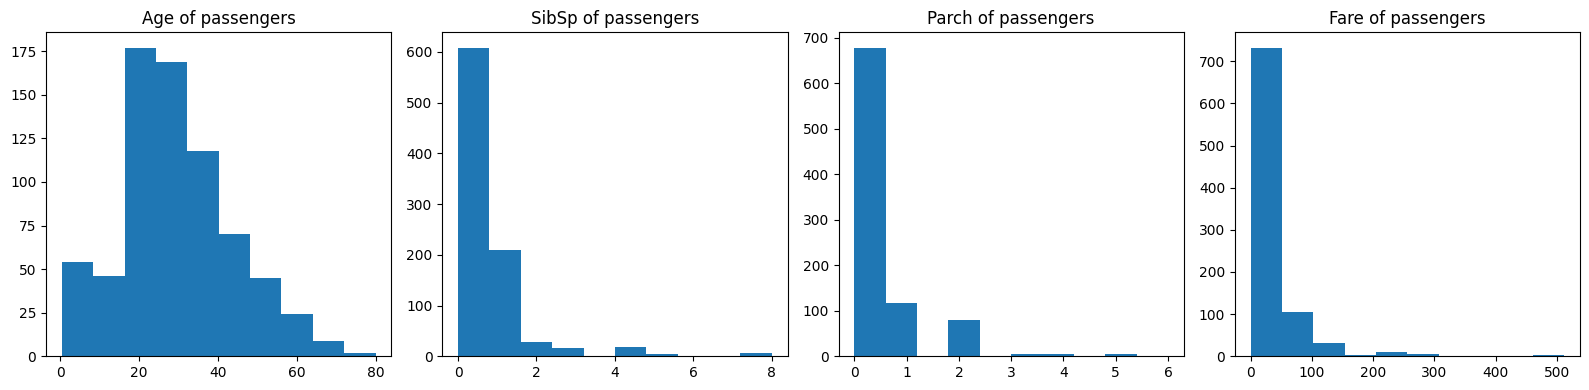

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

axes[0].hist(df[['Age']], bins = 10)
axes[0].set_title("Age of passengers")

axes[1].hist(df[['SibSp']], bins = 10)
axes[1].set_title("SibSp of passengers")

axes[2].hist(df[['Parch']], bins = 10)
axes[2].set_title("Parch of passengers")

axes[3].hist(df[['Fare']], bins = 10)
axes[3].set_title("Fare of passengers")

plt.tight_layout()
plt.show()

In [7]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Baseline Model

In [8]:
#Majority Class baseline
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.drop('Survived', axis=1)
y = df['Survived']

majority_class = 0

y_pred_baseline = [majority_class] * len(y)

m_baseline_accuracy = accuracy_score(y, y_pred_baseline)
print("Major class baseline accuracry: %.2f" % m_baseline_accuracy)

Major class baseline accuracry: 0.62


Accuracy Score 0.66480
Train accuracy Score 0.79775


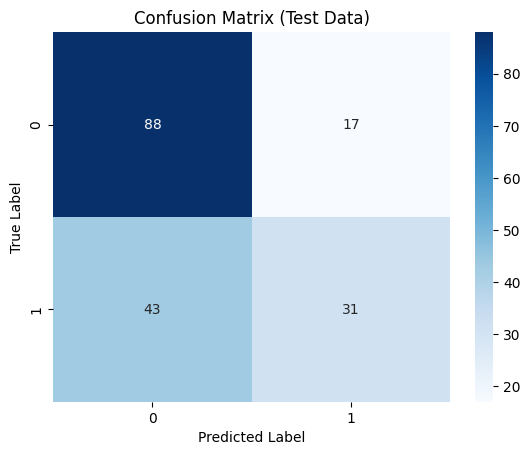

In [10]:
#KNN Classifier Baseline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

cols_to_drop = ['Name', 'Sex', 'Ticket','Embarked', 'Cabin']
X2 = df.copy()
X2 = df.drop(cols_to_drop, axis = 1)

def KNN_baseline(X):
    X.drop('PassengerId', axis=1, inplace=True)
    median = df['Age'].median()
    X['Age'].fillna(median, inplace=True)

    y = X['Survived']
    X.drop('Survived', axis=1,inplace=True)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=3)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    y_train_pred = knn.predict(X_train)


    accuracy = accuracy_score(y_test, y_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print("Accuracy Score %.5f" % accuracy)
    print("Train accuracy Score %.5f" % train_accuracy)
    
    cm_test = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix (Test Data)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
KNN_baseline(X2)

### Data Transformation

Accuracy Score 0.79888
Train accuracy Score 0.85253


,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0.0,1.0
1,1,38.0,1.0,0.0
2,3,26.0,1.0,0.0
3,1,35.0,1.0,0.0
4,3,35.0,0.0,1.0
...,...,...,...,...
886,2,27.0,0.0,1.0
887,1,19.0,1.0,0.0
888,3,28.0,1.0,0.0
889,1,26.0,0.0,1.0


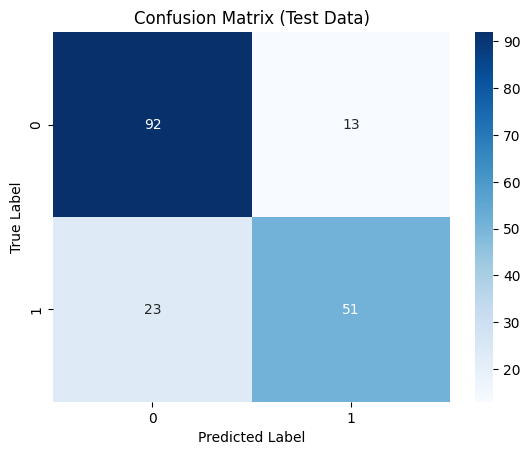

In [11]:
#gender encoding
from sklearn.preprocessing import OneHotEncoder

X3 = df.copy()

def one_hot_encode (X, col_name):
    col_data = X[[col_name]]
   
    encoder = OneHotEncoder()

    data_encoded = encoder.fit(col_data).transform(col_data)

    df_data_enc = pd.DataFrame(data_encoded.toarray(), columns=encoder.get_feature_names_out([col_name]))

    X = pd.concat([X, df_data_enc], axis = 1)
    X.drop(col_name, axis=1, inplace=True)
    return X

X3 = one_hot_encode(X3, 'Sex')
cols_to_drop = ['Name', 'Ticket','Embarked', 'Cabin', 'Fare', 'SibSp', 'Parch']
X3.drop(cols_to_drop, axis=1, inplace=True)


KNN_baseline(X3)
X3

### Cabins

Cabin_Letter          A          B          C          D     E          F  \
Survived                                                                    
0             53.333333  25.531915  40.677966  24.242424  25.0  38.461538   
1             46.666667  74.468085  59.322034  75.757576  75.0  61.538462   

Cabin_Letter     G      T  
Survived                   
0             50.0  100.0  
1             50.0    0.0  


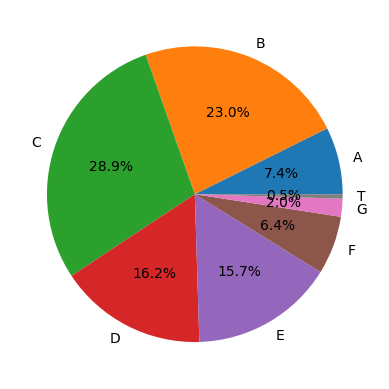

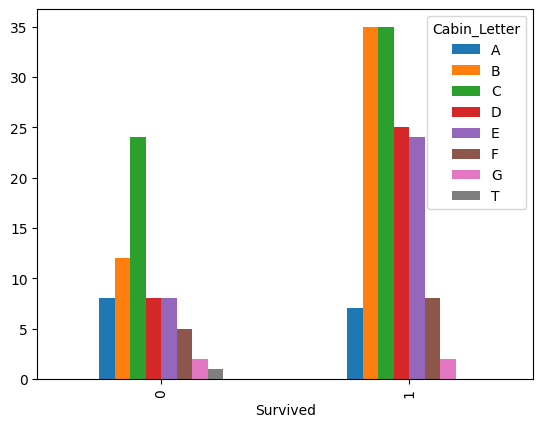

In [13]:
X6 = df.copy()

X6['Cabin_Letter'] = df['Cabin'].str[0] 

letter_counts = X6['Cabin_Letter'].value_counts()
letter_counts = letter_counts.sort_index()


plt.pie(letter_counts, labels=letter_counts.index, autopct='%1.1f%%')

letter_surv = X6.groupby(['Survived', 'Cabin_Letter']).size().unstack()
letter_surv = letter_surv

percentage_survival = (letter_surv / letter_counts * 100).fillna(0)

letter_surv.plot(kind='bar')
print(percentage_survival)

### Age with tittles

Accuracy Score 0.80447
Train accuracy Score 0.85815


,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0.0,1.0
1,1,38.0,1.0,0.0
2,3,26.0,1.0,0.0
3,1,35.0,1.0,0.0
4,3,35.0,0.0,1.0
...,...,...,...,...
886,2,27.0,0.0,1.0
887,1,19.0,1.0,0.0
888,3,8.0,1.0,0.0
889,1,26.0,0.0,1.0


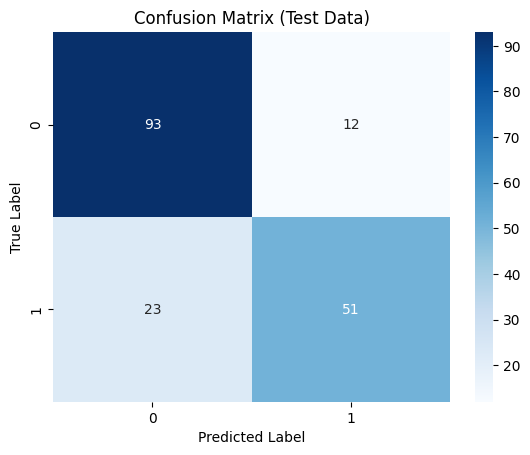

In [14]:
import random
adults = ['Mr', 'Mrs', 'Don', 'Dr', 'Mme', 'Major', 'Sir','Col', 'Capt', 'the Countess'] #20< <45
young = ['Miss','Master', 'Mlle', 'Jonkheer'] #0<<19
n_a = ['Rev', 'Ms', 'Lady']

median = df['Age'].median()

X7 = df.copy()
X7['Title'] = X7['Name'].str.extract(r',\s(.*?)\.')

random.seed(42)
def fill_age(row):
    if pd.notna(row['Age']):
        return row['Age']
    if row['Title'] in adults:
        return random.randint(20, 45)
    elif row['Title'] in young:
        return random.randint(0, 19)
    else:
        return median
    
X7['Age'] = X7.apply(fill_age, axis=1)

X7 = one_hot_encode(X7, 'Sex')

cols_to_drop = ['Name', 'Ticket','Embarked', 'SibSp', 'Parch', 'Fare', 'Title', 'Cabin']
X7.drop(cols_to_drop, axis=1, inplace=True)

KNN_baseline(X7)
X7

### Age with randomForestClassifier

In [15]:
from sklearn.ensemble import RandomForestRegressor

X8 = df.copy()

#title
X8['Title'] = X8['Name'].str.extract(r',\s(.*?)\.')
age_map1 = {
    title: 'A' for title in adults
}
age_map1.update({
    title: 'Y' for title in young
})
age_map1.update({
    title: 'N' for title in n_a
})
X8['Title']= X8['Title'].map(age_map1)
#title end

X8 = one_hot_encode(X8, 'Sex')
X8 = one_hot_encode(X8, 'Title')

cols_to_drop = ['Pclass','Name', 'Ticket','PassengerId','Survived', 'Cabin', 'Embarked']
X8.drop(cols_to_drop, axis=1, inplace=True)

known = X8.dropna(subset=['Age'])
missing = X8[X8['Age'].isna()]

y = known.values[:,5]
X = X8[X8['Age'].notna()].drop('Age', axis=1)

rtr = RandomForestRegressor(n_estimators=2000, n_jobs=-1, random_state=42)
rtr.fit(X,y)

imputed_ages = rtr.predict(missing.drop('Age', axis=1))

X8.loc[X8['Age'].isna(), 'Age'] = imputed_ages
X8


,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_A,Title_N,Title_Y
0,22.0,1,0,7.2500,0.0,1.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,1.0,0.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,0.0,1.0,0.0,1.0,0.0
887,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,0.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


Accuracy Score 0.82123
Train accuracy Score 0.85112


,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0.0,1.0
1,1,38.0,1.0,0.0
2,3,26.0,1.0,0.0
3,1,35.0,1.0,0.0
4,3,35.0,0.0,1.0
...,...,...,...,...
886,2,27.0,0.0,1.0
887,1,19.0,1.0,0.0
888,3,0.0,1.0,0.0
889,1,26.0,0.0,1.0


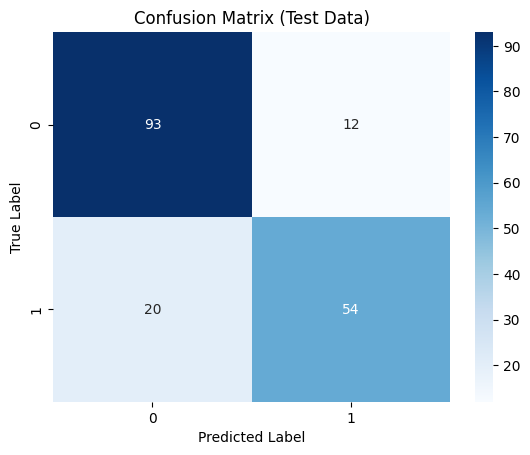

In [17]:
from sklearn.preprocessing import StandardScaler

X9 = df.copy()
X9.loc[X9['Age'].isna(), 'Age'] = imputed_ages

X9 = one_hot_encode(X9, 'Sex')

cols_to_drop = ['Name', 'Ticket','Cabin', 'SibSp', 'Parch','Embarked', 'Fare']
X9.drop(cols_to_drop, axis=1, inplace=True)

KNN_baseline(X9)
X9